In [1]:
# set up environment
!git clone https://github.com/Sherif-Elfiky/CSE151AProj.git

Cloning into 'CSE151AProj'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 66 (delta 14), reused 19 (delta 6), pack-reused 0
Receiving objects: 100% (66/66), 8.38 MiB | 4.66 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read data
data = pd.read_csv('CSE151AProj/historical_data.csv')
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


**There are 197428 observations and 16 features**

## Data Preprocessing

In [4]:
# convert values for features created_at and actual_delivery_time from strings to datetime
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [5]:
# create new feature time_to_deliver, which represents the actual duration the order takes as a datetime
data['time_to_deliver'] = (pd.to_datetime(data['actual_delivery_time']) - pd.to_datetime(data['created_at'])).dt.total_seconds()
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0


Missing data for store_primary_category. Getting NaN values. On kaggle, it says its N/A, so we need to replace the missing values in the dataframe with N/A.

In [6]:
# replace observations with store_primary_category as NaN with N/A
data.fillna({'store_primary_category': 'N/A'})

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,N/A,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,N/A,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,N/A,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0


<Axes: >

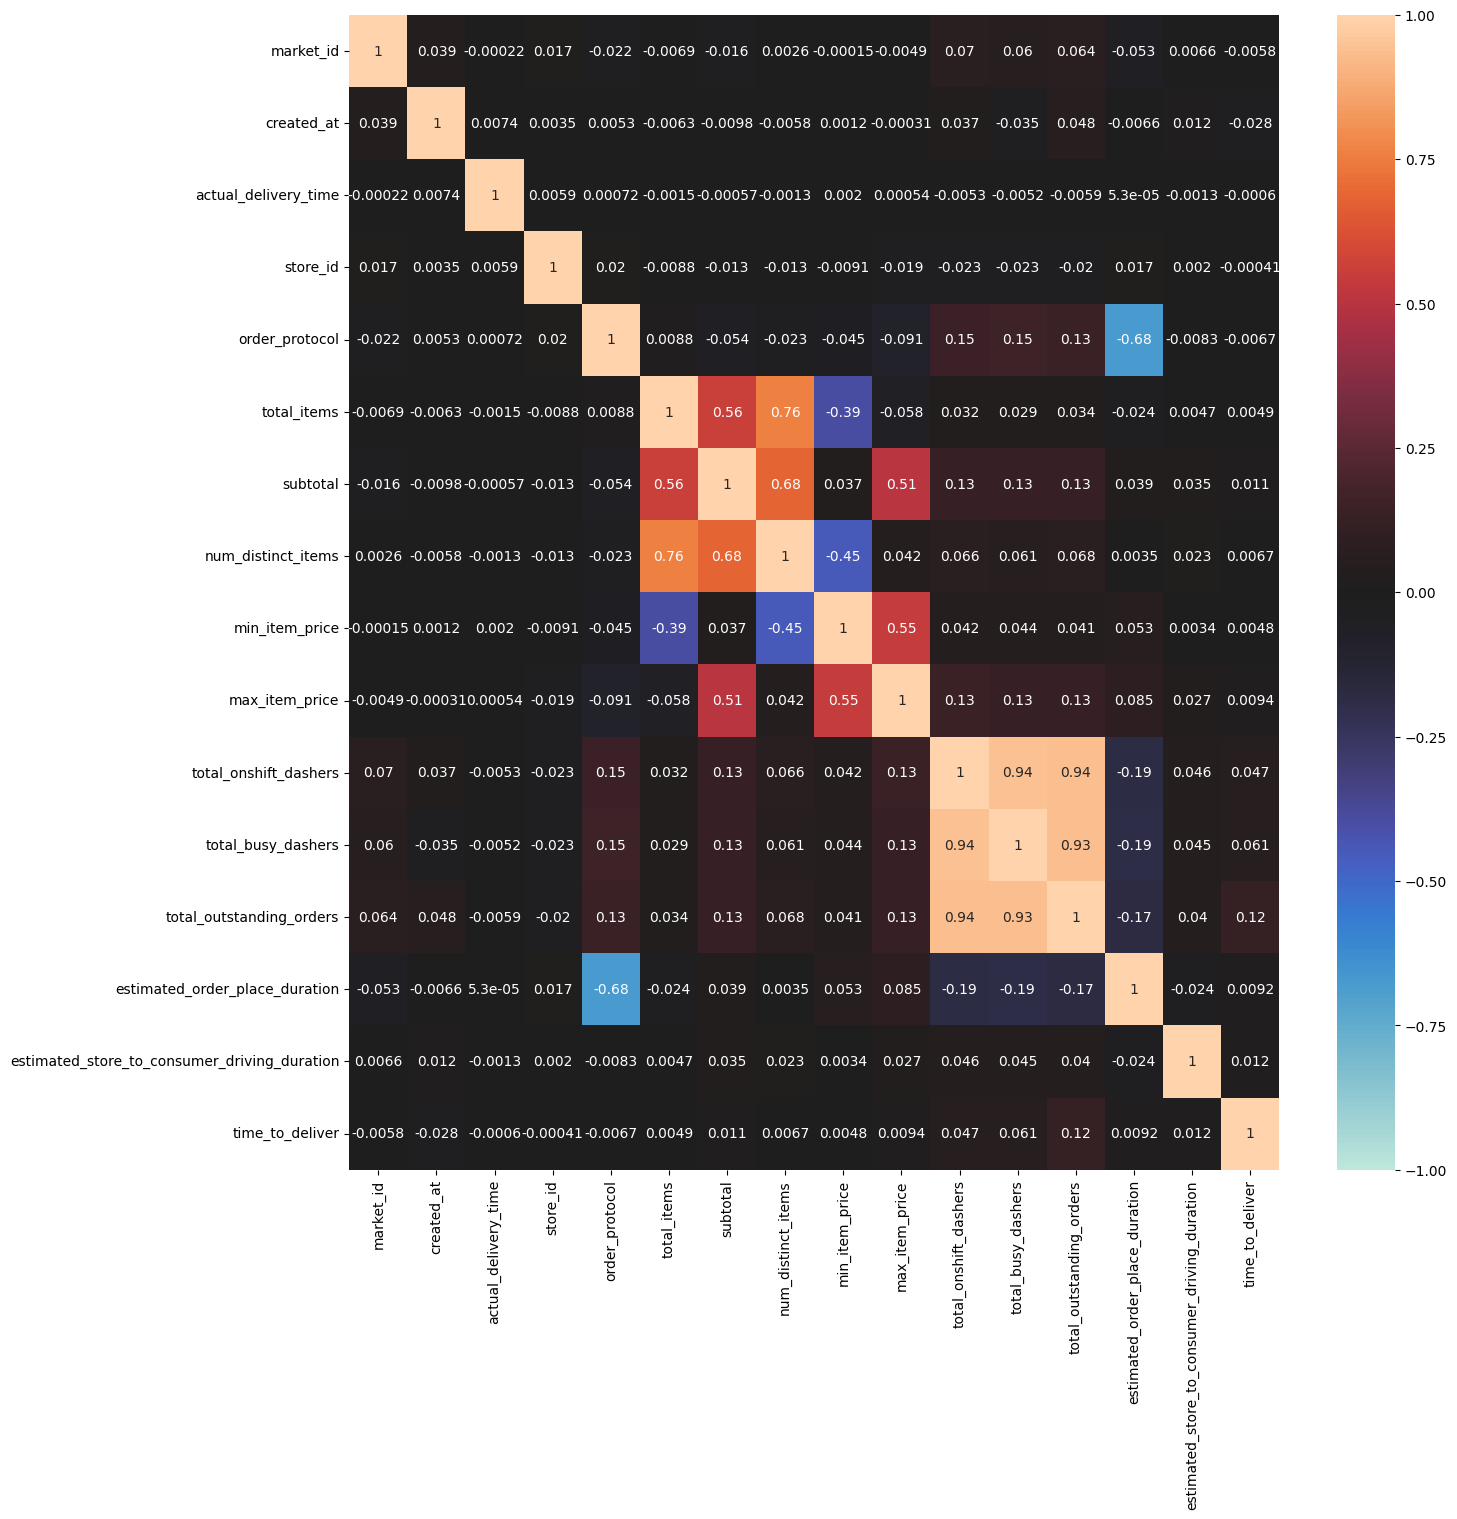

In [7]:
no_category = data.drop(['store_primary_category'], axis=1)
# find correspondance between features
corr = no_category.corr()
# plot heatmap with the correspondance values between two features
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)

Very high correspondance between total_onshift_dashers, total_busy_dashers, and total_outstanding_orders. This makes sense because there are going to be more orders going on and dashers busy when there are more dashers on shift. All features besides `time_to_deliver` have low correspondance with it.

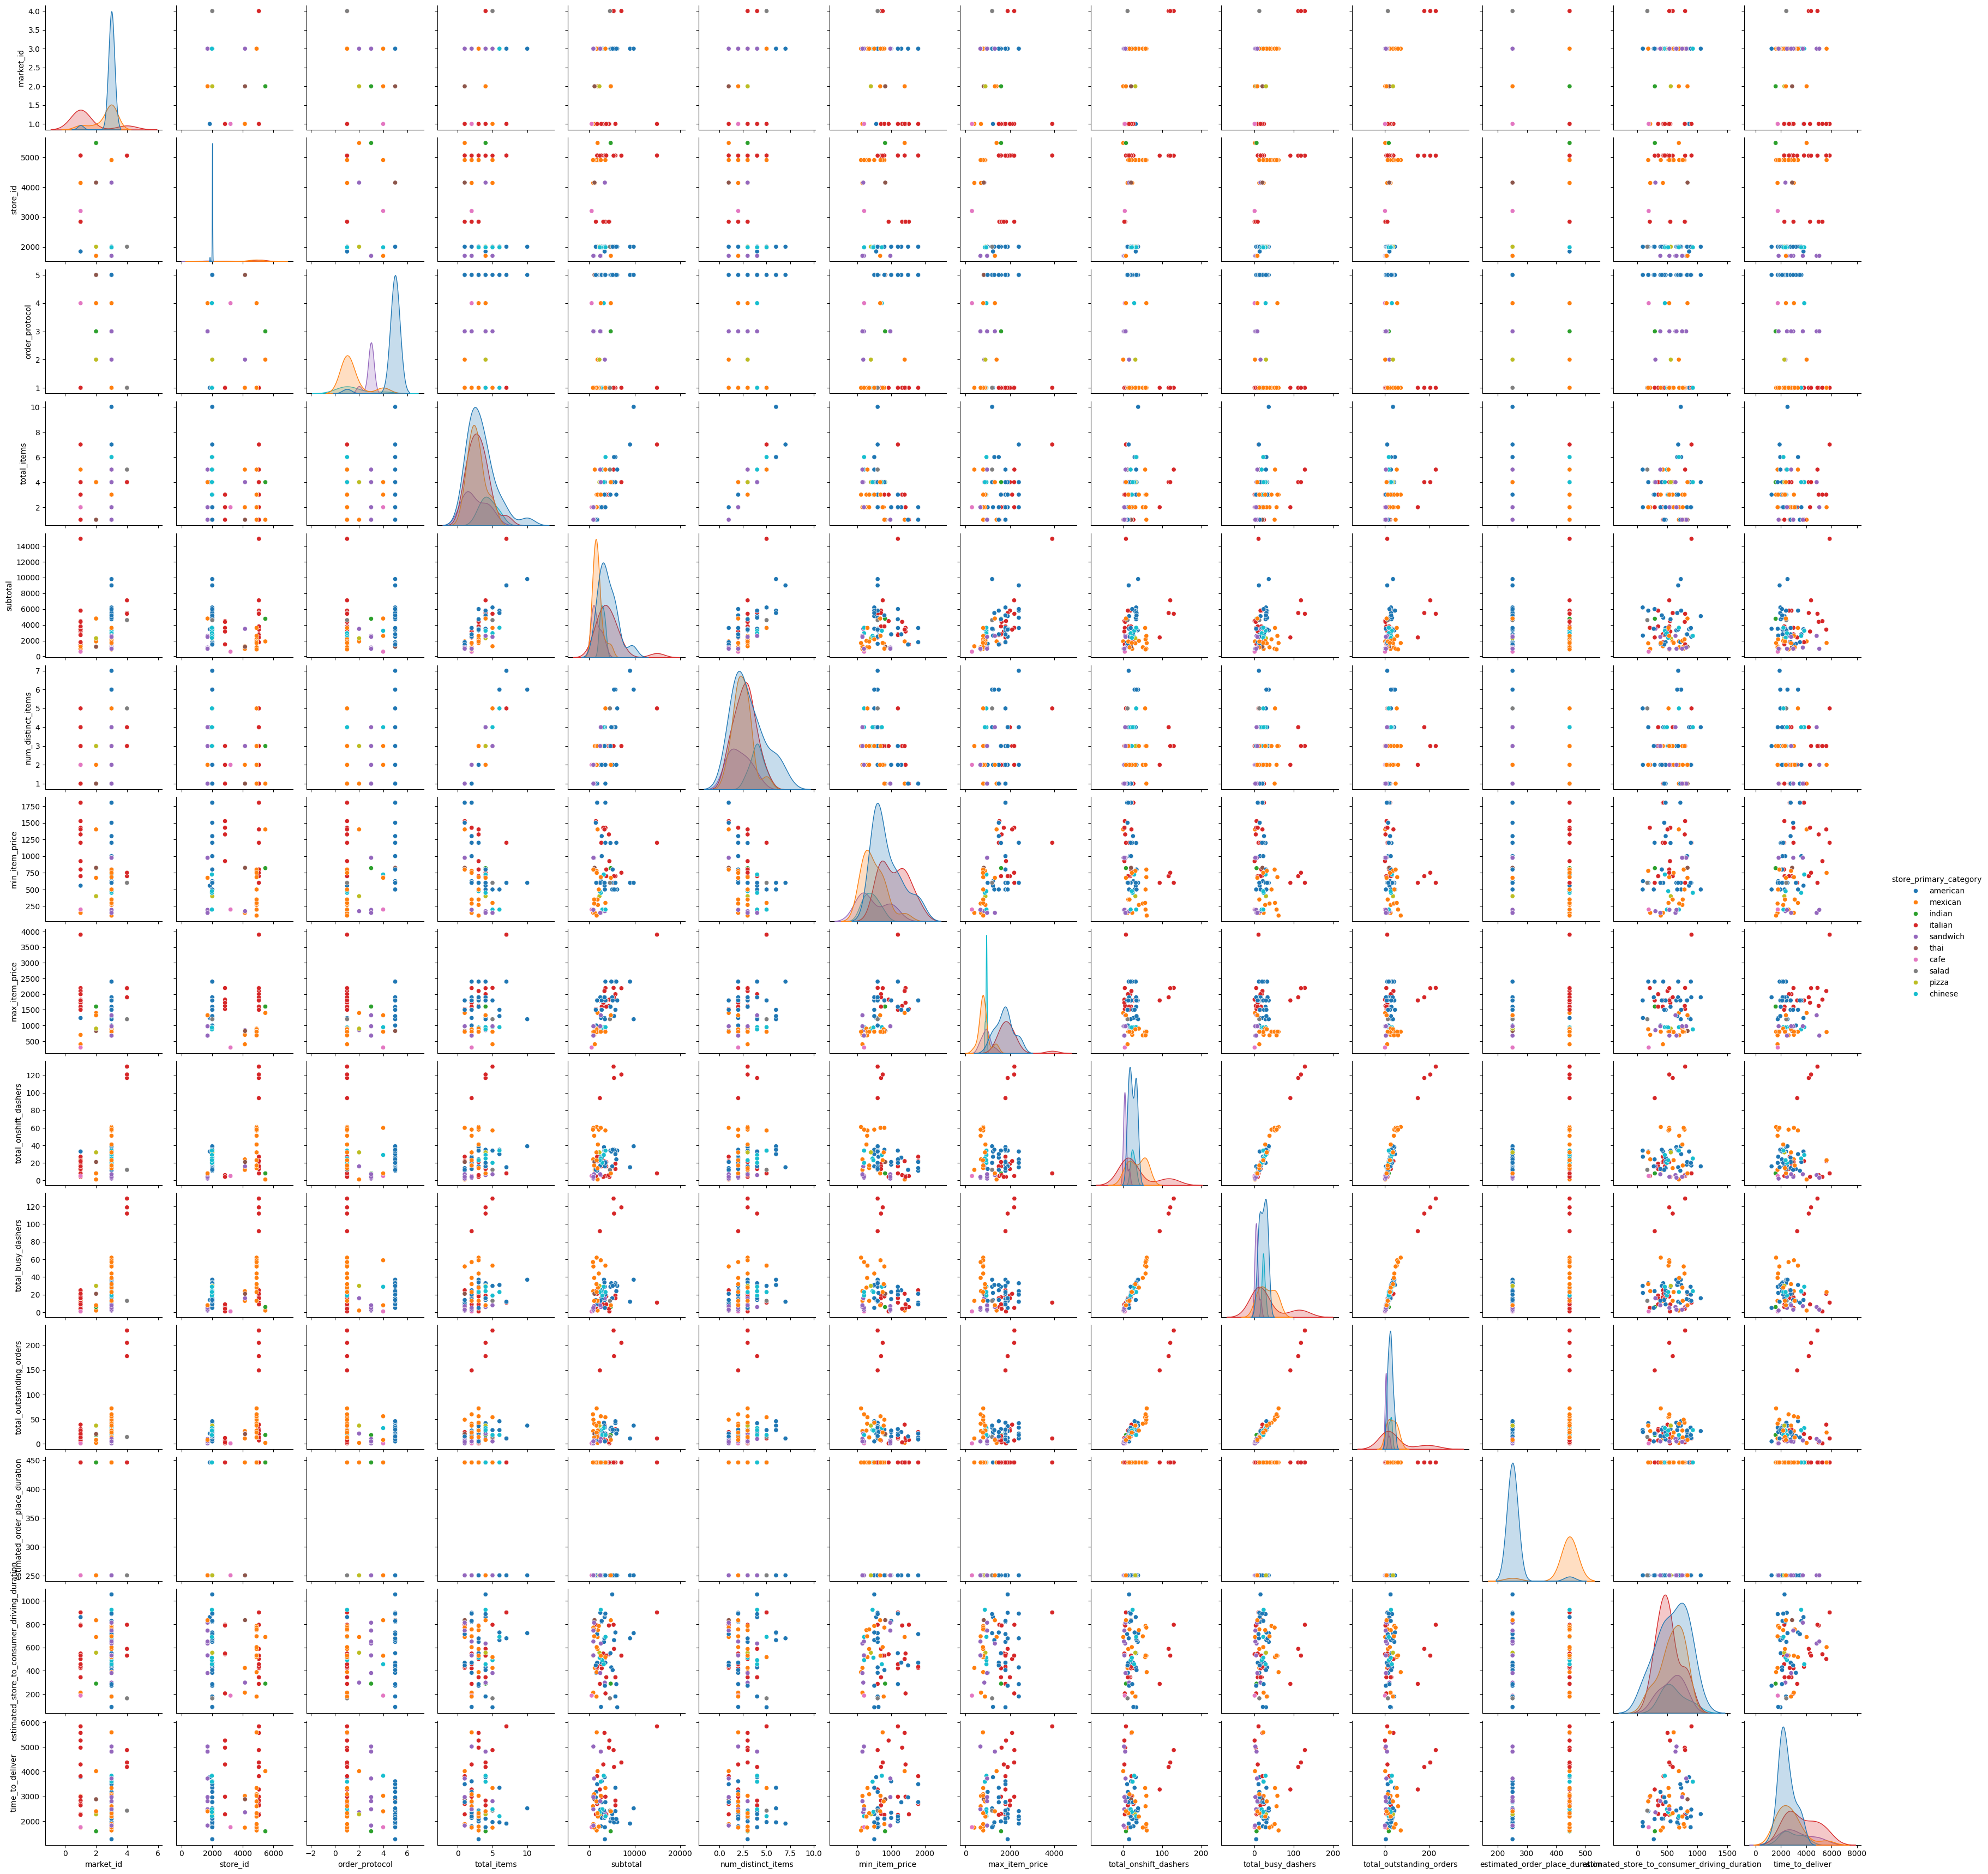

In [8]:
# let's visualize our data - only doing first 100 observations because of dataset size
sns.pairplot(data.head(100), hue = 'store_primary_category')

`total_items`, `subtotal`, `num_distinct_items`, and `time_to_deliver` seem normally distributed but skewed for some types of stores like mediterranean for example. However, we shouldn't standardize because other stores do not fit the bell curve for those features. Additionally, a lot of these patterns are vertical lines because some of the features here are categorical.

Another thing to note is that there are lots and lots of outliers. Let's first get rid of those super big outliers. However, its worth to note that the rest of the data may not necessarily these patterns, but after a trial of data preprocessing without taking these outliers out, we saw that the outliers were outliers for the whole dataset.

In [9]:
# drop outliers
data = data[data['total_outstanding_orders'] < 100]
data = data[data['max_item_price'] < 3000]
data = data[data['max_item_price'] < 2000]
data = data[data['subtotal'] < 11000]
data = data[data['total_items'] <= 10]

Let's also min-max scale our numerical features. `estimated_order_place_duration` is weird and is the time the restaurant takes to receive the order from DoorDash. Resembles a categorical variable more so than a numerical, so let's treat it as a categorical feature.

In [11]:
from sklearn.preprocessing import MinMaxScaler
import datetime as ds

In [16]:
# minmax numerical data that isn't a datetime or categorical
numerical_data = data.drop(['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'estimated_order_place_duration'], axis=1)
mms = MinMaxScaler()
mm_data = pd.DataFrame(mms.fit_transform(numerical_data),columns=numerical_data.columns)

numerical_data = mm_data
numerical_data['time_to_deliver'] = data['time_to_deliver'] # don't minmax our predictions (units should stay in seconds)
numerical_data

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_to_deliver
0,0.333333,0.313017,0.333333,0.298099,0.619810,0.262411,0.133803,0.257143,0.412356,3779.0
1,0.000000,0.172837,0.000000,0.688920,0.700350,0.035461,0.049296,0.076190,0.330460,4024.0
2,0.000000,0.172837,0.000000,0.920723,0.950475,0.035461,0.035211,0.057143,0.330460,1781.0
3,0.555556,0.627672,0.444444,0.318034,0.900450,0.035461,0.042254,0.076190,0.138410,3075.0
4,0.222222,0.354771,0.222222,0.549838,0.800400,0.070922,0.077465,0.142857,0.311303,2390.0
...,...,...,...,...,...,...,...,...,...,...
134661,0.222222,0.126353,0.222222,0.199815,0.324662,0.148936,0.154930,0.276190,0.158525,3111.0
134662,0.555556,0.273811,0.333333,0.227631,0.412706,0.113475,0.112676,0.190476,0.438218,3039.0
134663,0.444444,0.167015,0.222222,0.178952,0.199600,0.304965,0.323944,0.438095,0.380747,2455.0
134664,0.000000,0.106886,0.000000,0.287900,0.267634,0.078014,0.084507,0.171429,0.183908,1338.0


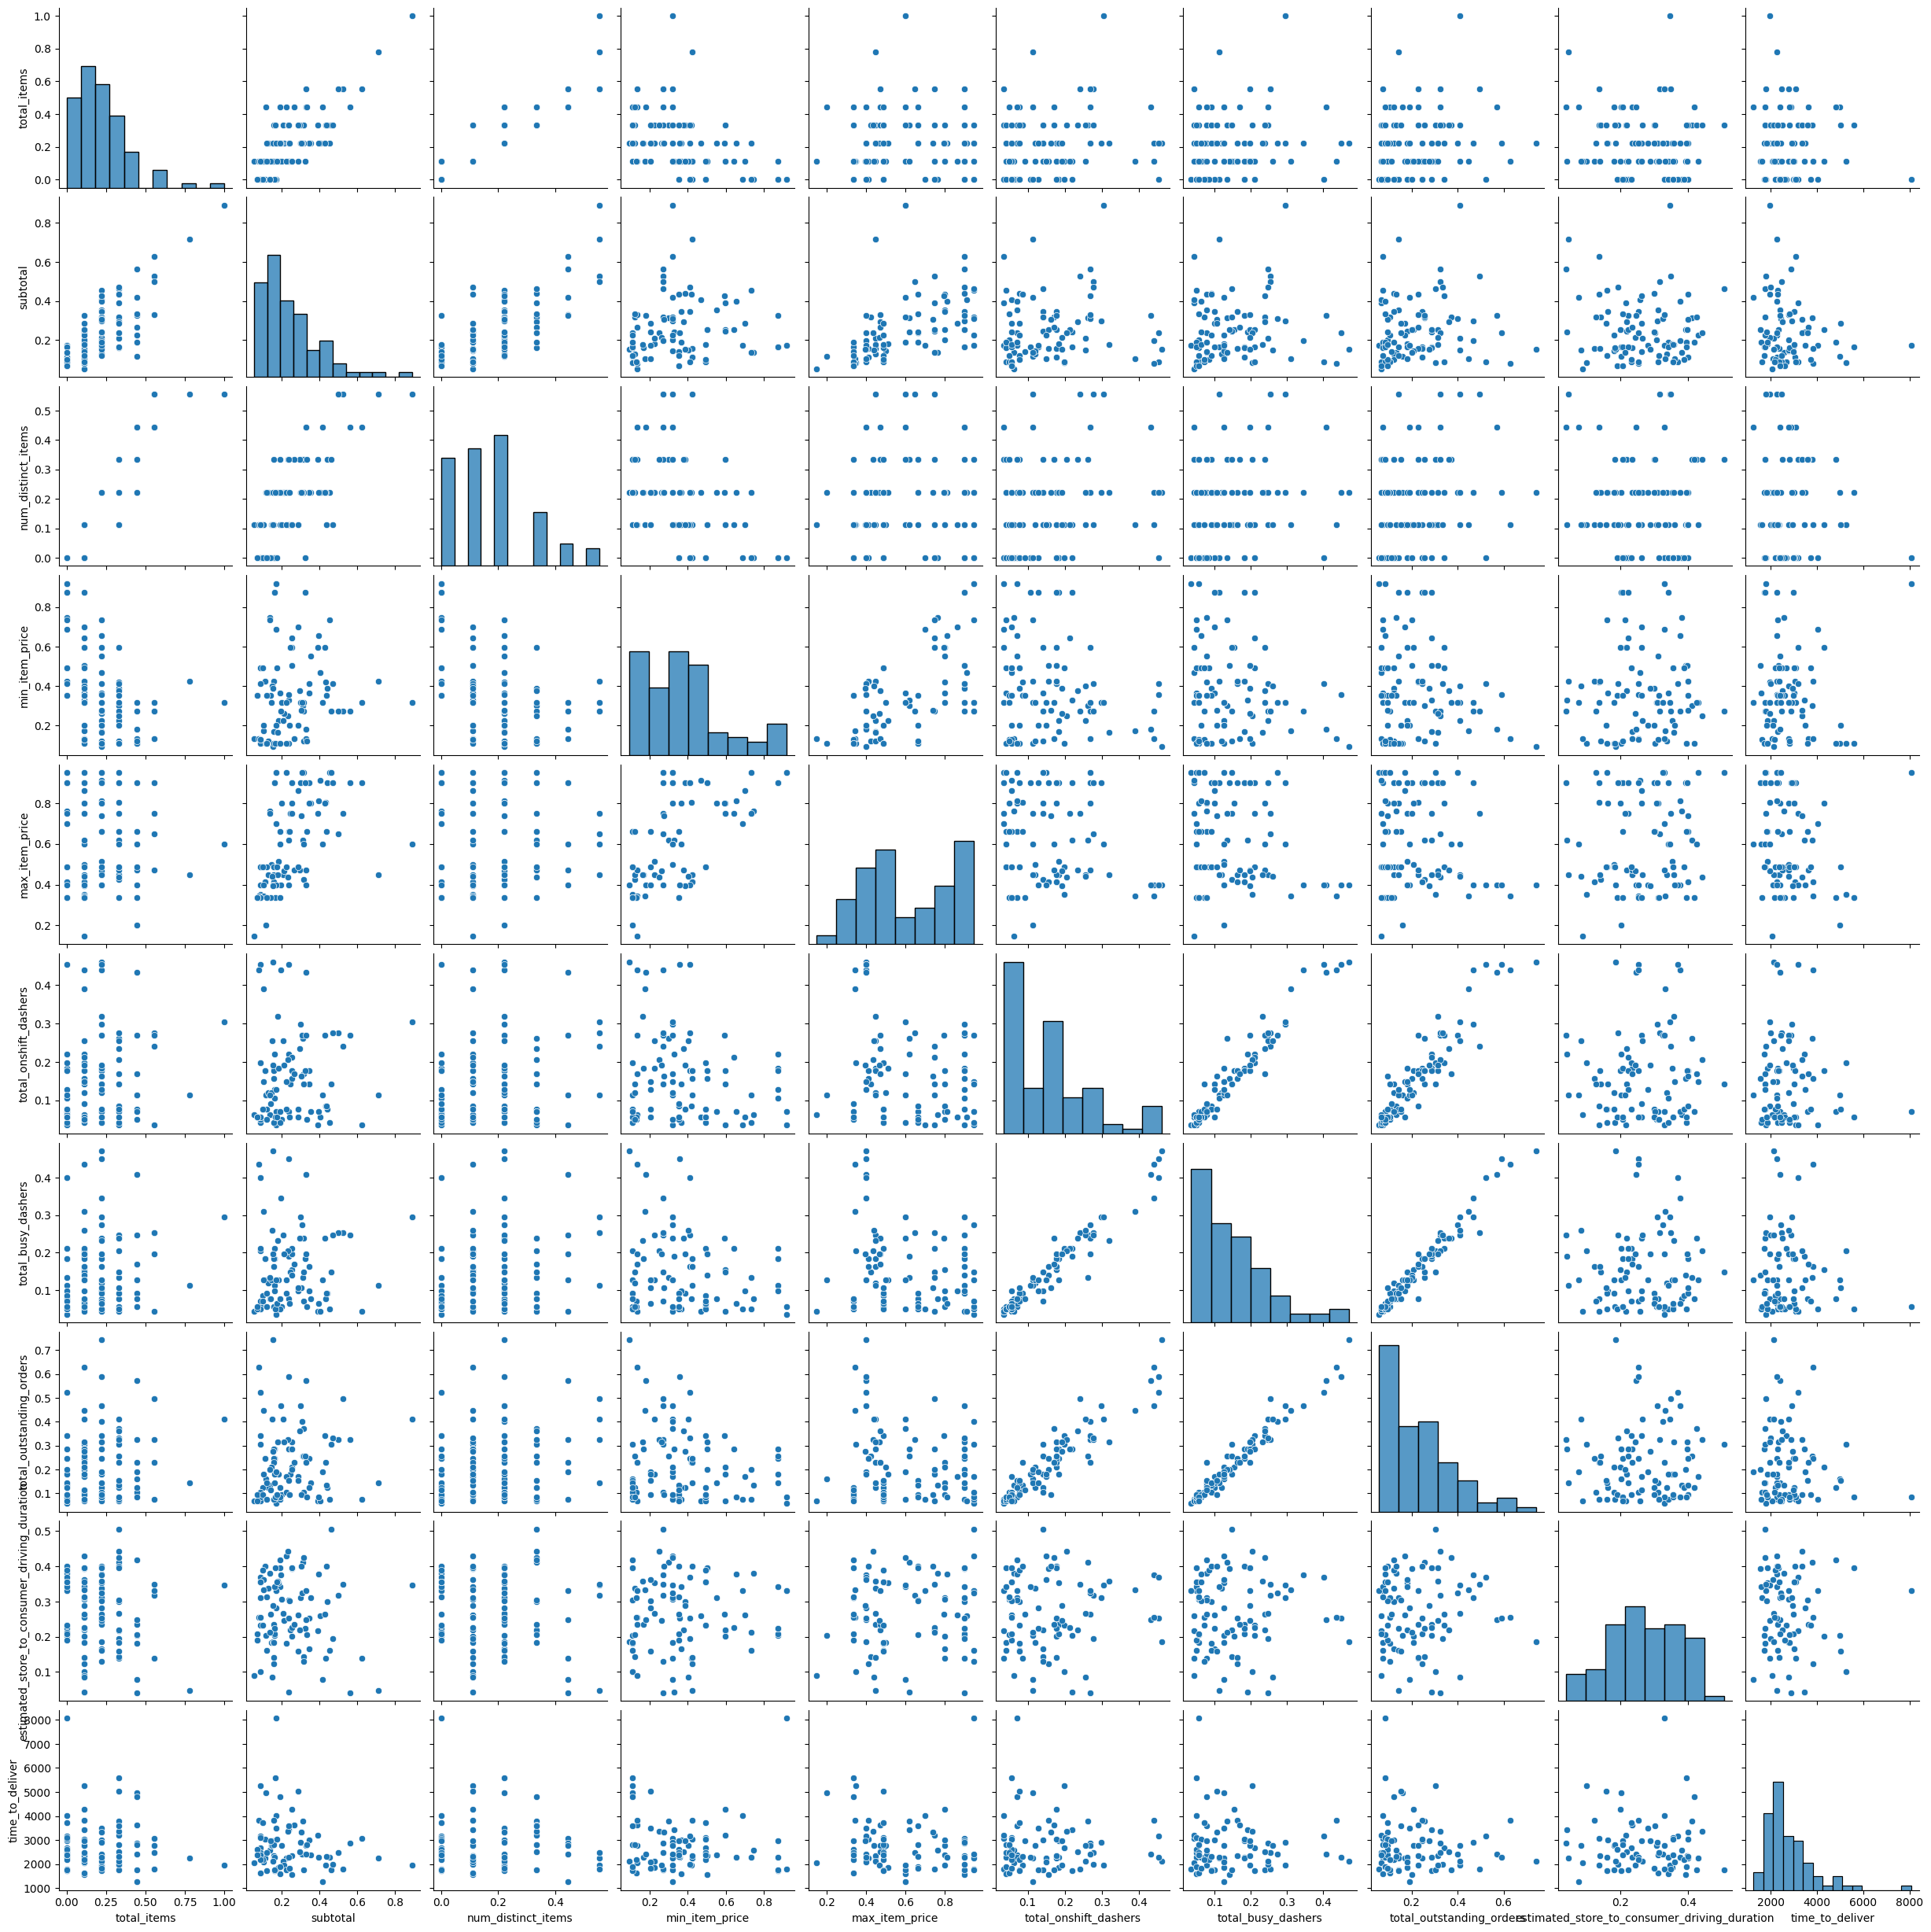

In [17]:
# let's see our data now
sns.pairplot(numerical_data.head(100))

None of the pairplots between features vs. `time_to_deliver` seem to have any clear pattern. Let's try a simple linear regression though. `total_outstanding_orders` vs. `time_to_deliver` seems like one of the more promising plots for linear regression.

In [18]:
numerical_data.dropna(inplace=True)

In [19]:
# we use total_outstanding_orders to predict time_to_deliver
X = numerical_data['total_outstanding_orders']

# we want to predict time_to_deliver
y = numerical_data['time_to_deliver']

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split

# split train/test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression

# our linear regression:
reg = LinearRegression()

# fit on training set
regmodel = reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
yhat_train = regmodel.predict(X_train.values.reshape(-1,1)) # training predictions

# what's our coefficient?
print('Coefficients: \n', regmodel.coef_)

Coefficients: 
 [[23.59521595]]


In [25]:
# get training predictions
yhat_train = regmodel.predict(X_train.values.reshape(-1,1))
yhat_train

array([[2732.14291131],
       [2733.49120936],
       [2749.89550236],
       ...,
       [2740.00798329],
       [2737.08667084],
       [2732.14291131]])

In [28]:
# training ground truth of time_to_deliver
y_train.values.reshape(-1,1)

array([[3057.],
       [4837.],
       [1678.],
       ...,
       [3432.],
       [1148.],
       [2621.]])

In [26]:
# testing predictions of time_to_deliver based on total_outstanding_orders
yhat_test = regmodel.predict(X_test.values.reshape(-1,1))
yhat_test

array([[2735.06422376],
       [2732.14291131],
       [2747.42362259],
       ...,
       [2735.06422376],
       [2732.36762765],
       [2740.90684866]])

In [27]:
# testing ground truth of time_to_deliver
y_test.values.reshape(-1,1)

array([[1276.],
       [3240.],
       [ 912.],
       ...,
       [1514.],
       [2117.],
       [4091.]])

In [29]:
from sklearn.metrics import mean_squared_error

# let's see our mean squared error
print('Training MSE: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nTesting MSE: %.2f' % mean_squared_error(y_test, yhat_test))

Training MSE: 1282707.49

Testing MSE: 1316013.11


As expected, our model did really poorly here. Our testing error is actually less than our training error, which means that our model underfit. So, if we plotted our model on the fitting graph, it would be towards the left of the graph. Next time, we are thinking of trying a neural network since we don't have a clear pattern at all and need a more complex model to minimize error. Additionally, we should try predicting using all the features next time.